[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Apr 17 10:15:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   31C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/studio-lab-user/yolov8


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
!pip install ultralytics==8.0.20

In [ ]:
# !pip uninstall -y opencv-python
# !pip install opencv-python==4.6.0.66
# !pip install opencv-python-headless==4.5.5.64

# Fix Glib error
!conda config --append channels conda-forge
!conda update -n base conda -y
! conda install glib=2.51.0 -y

In [4]:
# Pip install method (recommended)
from IPython import display
display.clear_output()


import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 15.4 GB RAM, 0.0/27.0 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [24]:
import os

key = os.environ.get('api_key')
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key=key)
project = rf.workspace("mlse").project("football-player-detection-on1w3")
dataset = project.version(16).download("yolov8")


mkdir: cannot create directory '/home/studio-lab-user/yolov8/datasets': File exists
/home/studio-lab-user/yolov8/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to football-player-detection-16 in yolov8:: 100%|██████████| 7557/7557 [00:00<00:00, 11825.26it/s]


## Custom Training

In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=50 imgsz=512 plots=True

/home/studio-lab-user/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/home/studio-lab-user/yolov8/datasets/football-player-detection-16/data.yaml, epochs=50, patience=50, batch=16, imgsz=512, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [26]:
!ls {HOME}/runs/detect/train/

F1_curve.png				       train_batch2.jpg
PR_curve.png				       train_batch8680.jpg
P_curve.png				       train_batch8681.jpg
R_curve.png				       train_batch8682.jpg
args.yaml				       val_batch0_labels.jpg
confusion_matrix.png			       val_batch0_pred.jpg
events.out.tfevents.1681727163.default.1643.0  val_batch1_labels.jpg
results.csv				       val_batch1_pred.jpg
results.png				       val_batch2_labels.jpg
train_batch0.jpg			       val_batch2_pred.jpg
train_batch1.jpg			       weights


/home/studio-lab-user/yolov8


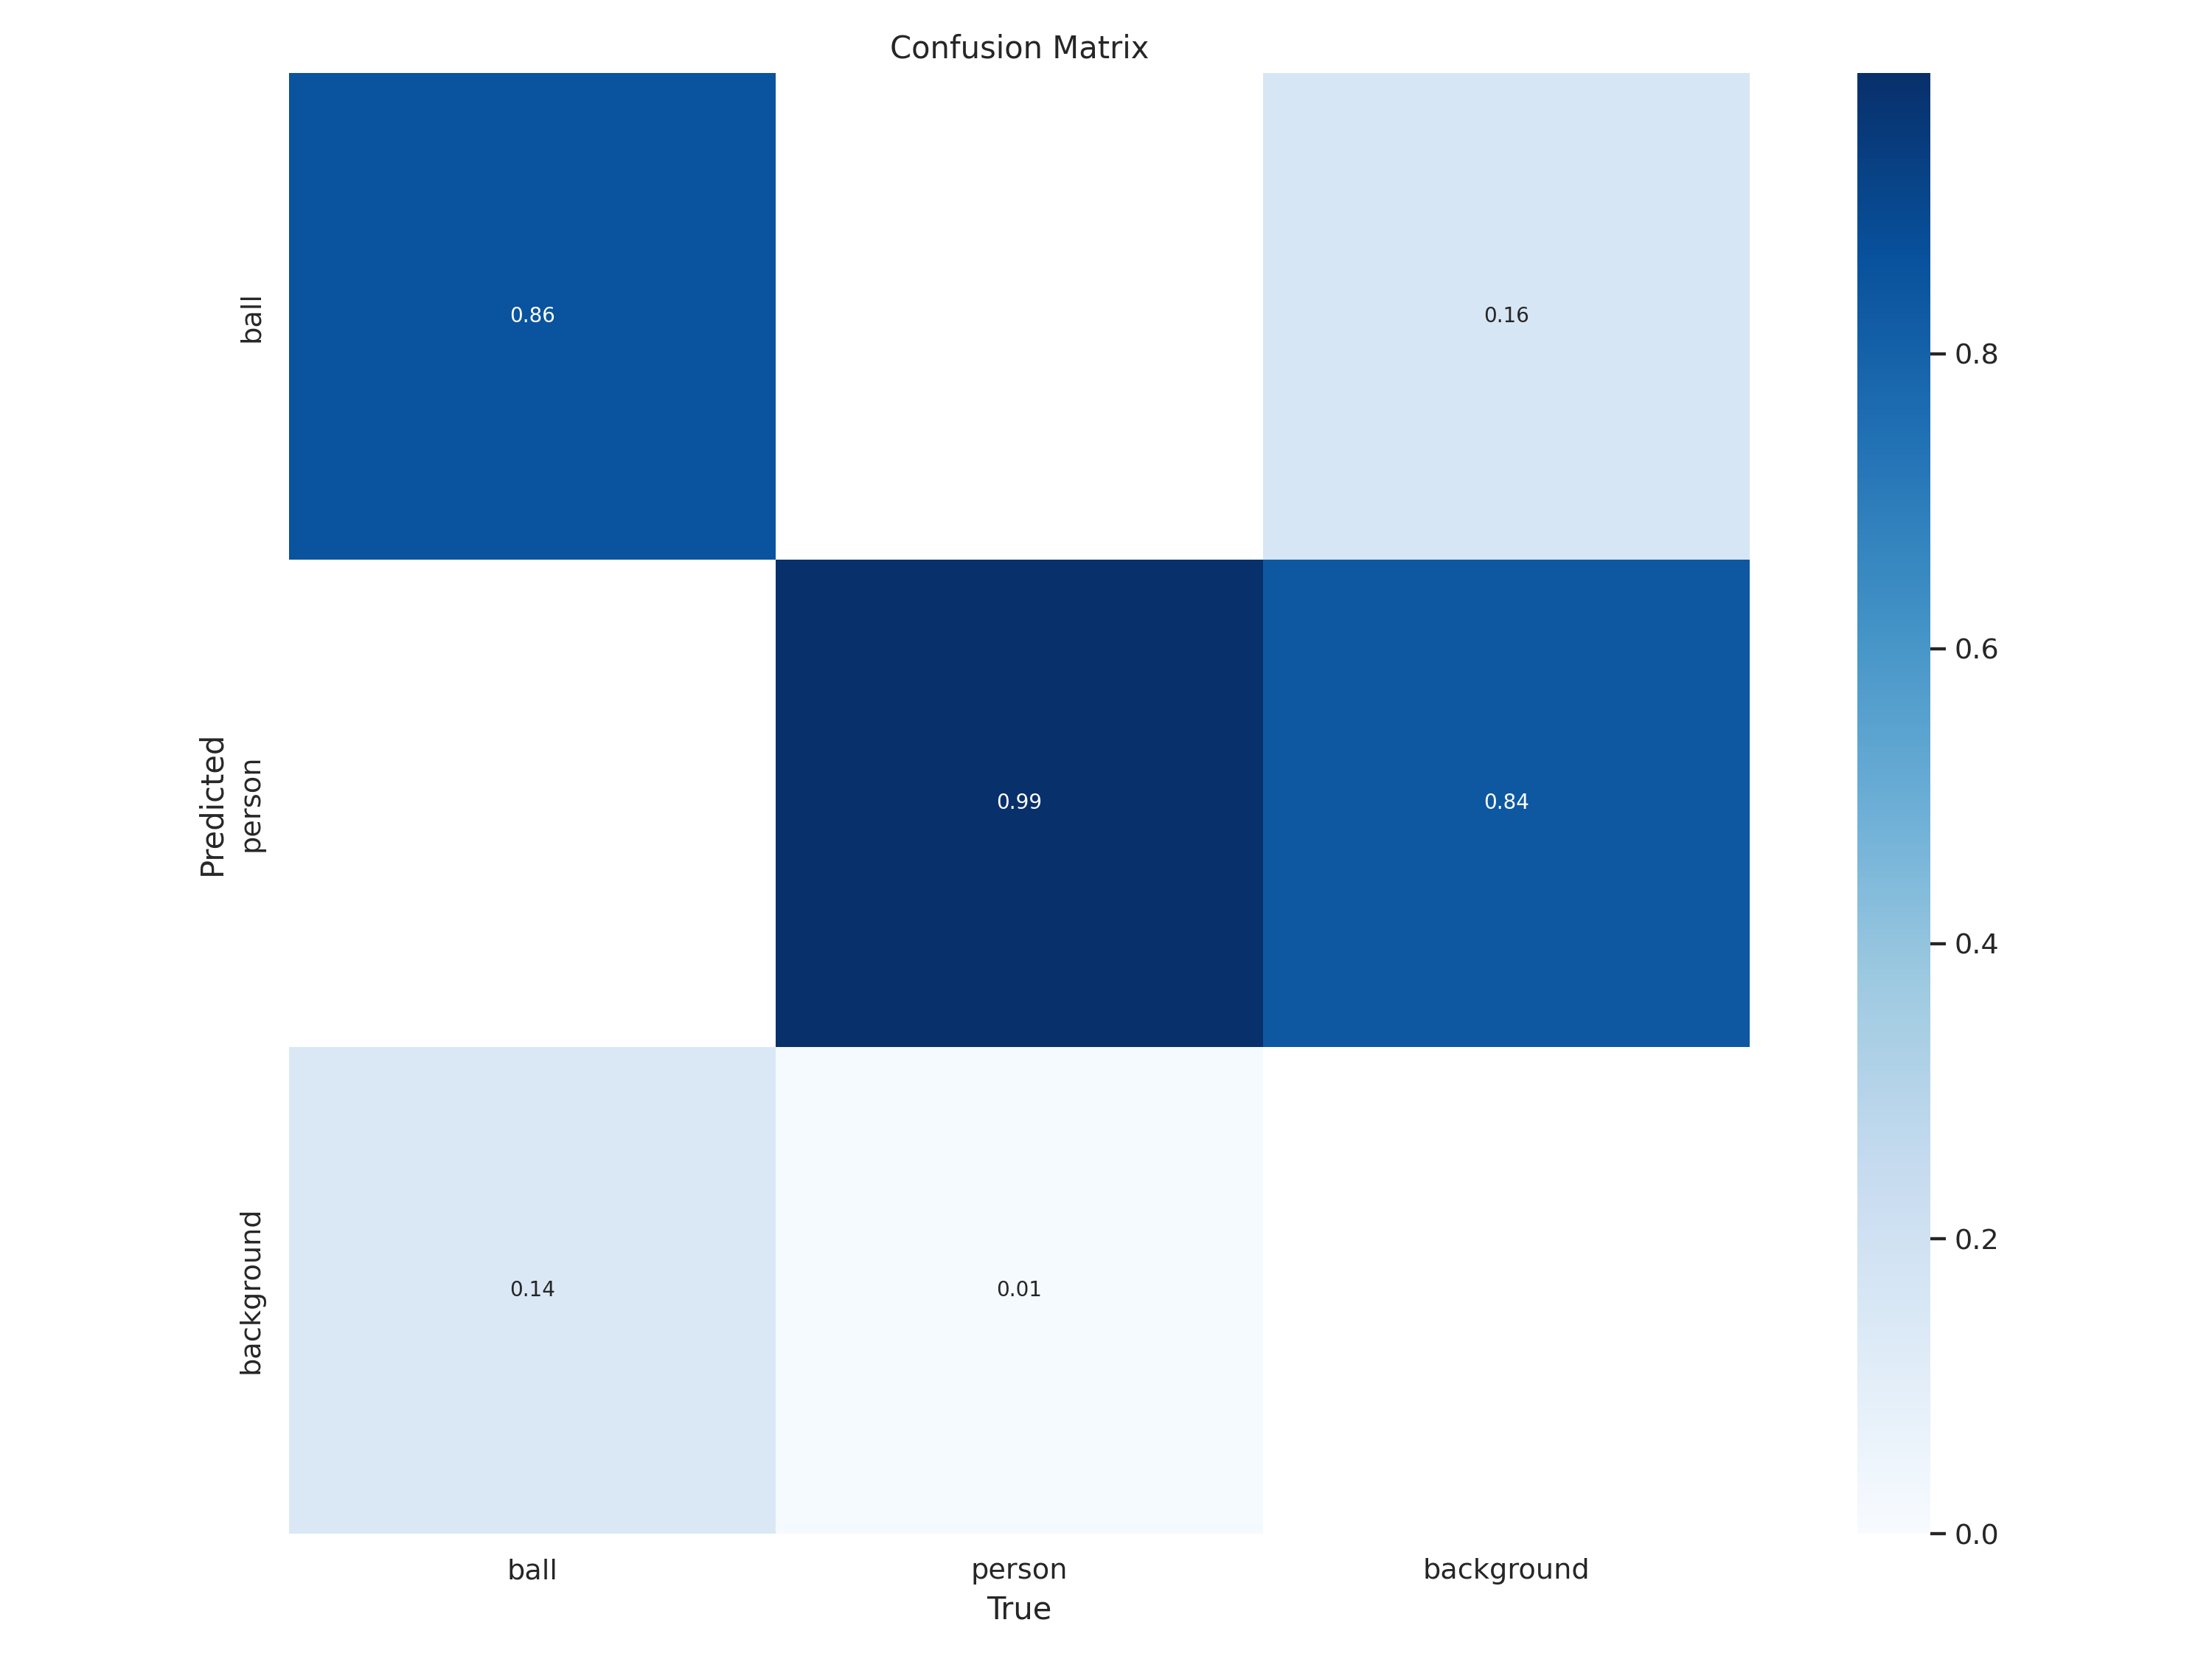

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/studio-lab-user/yolov8


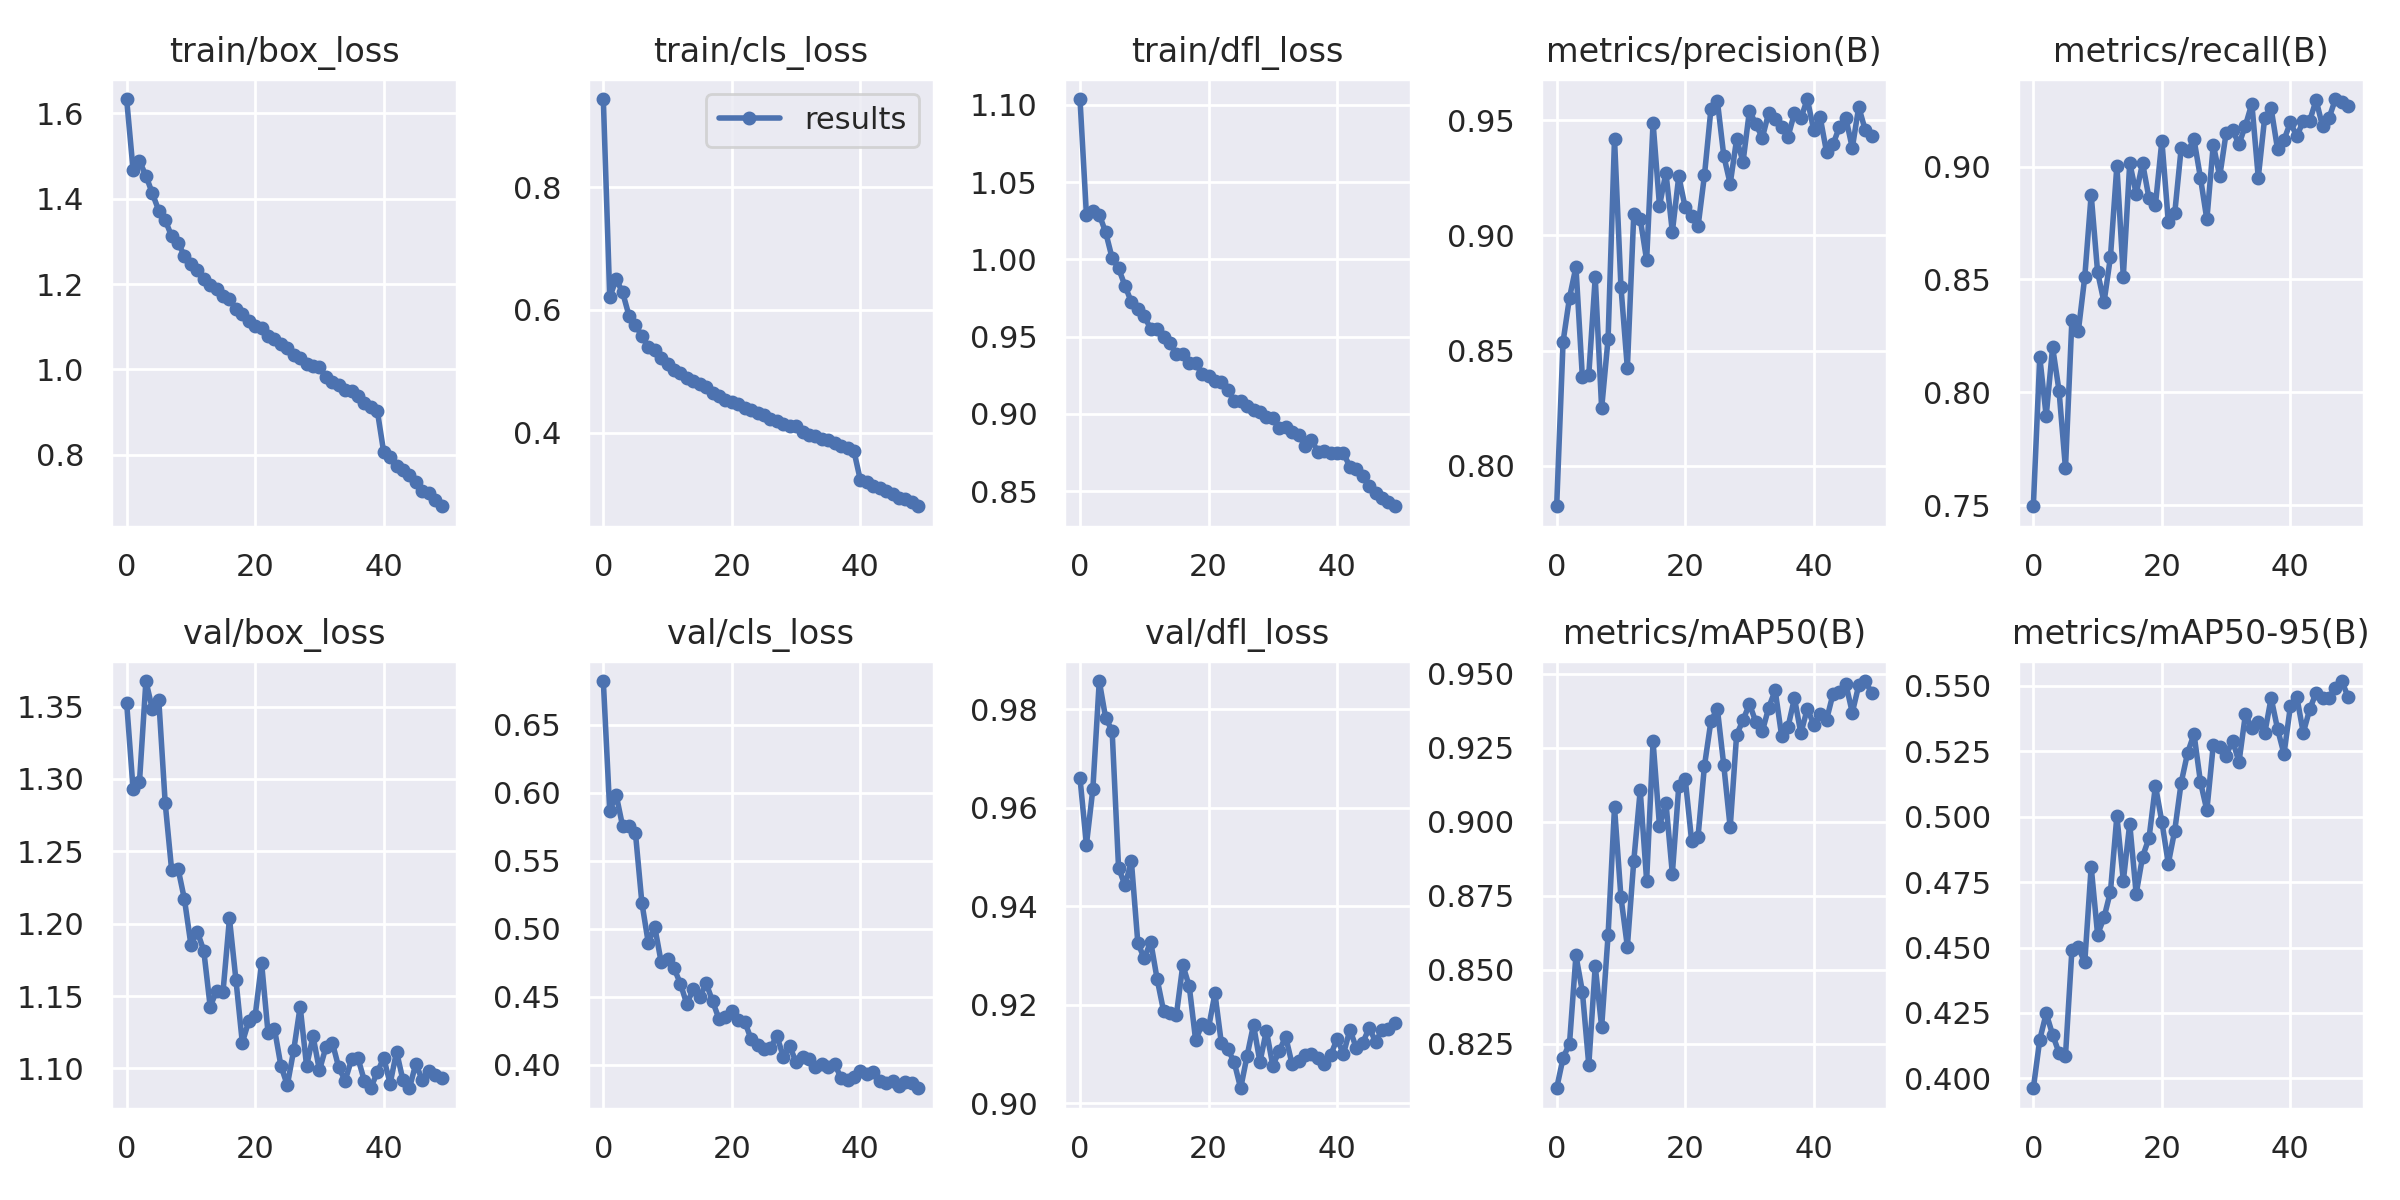

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/home/studio-lab-user/yolov8


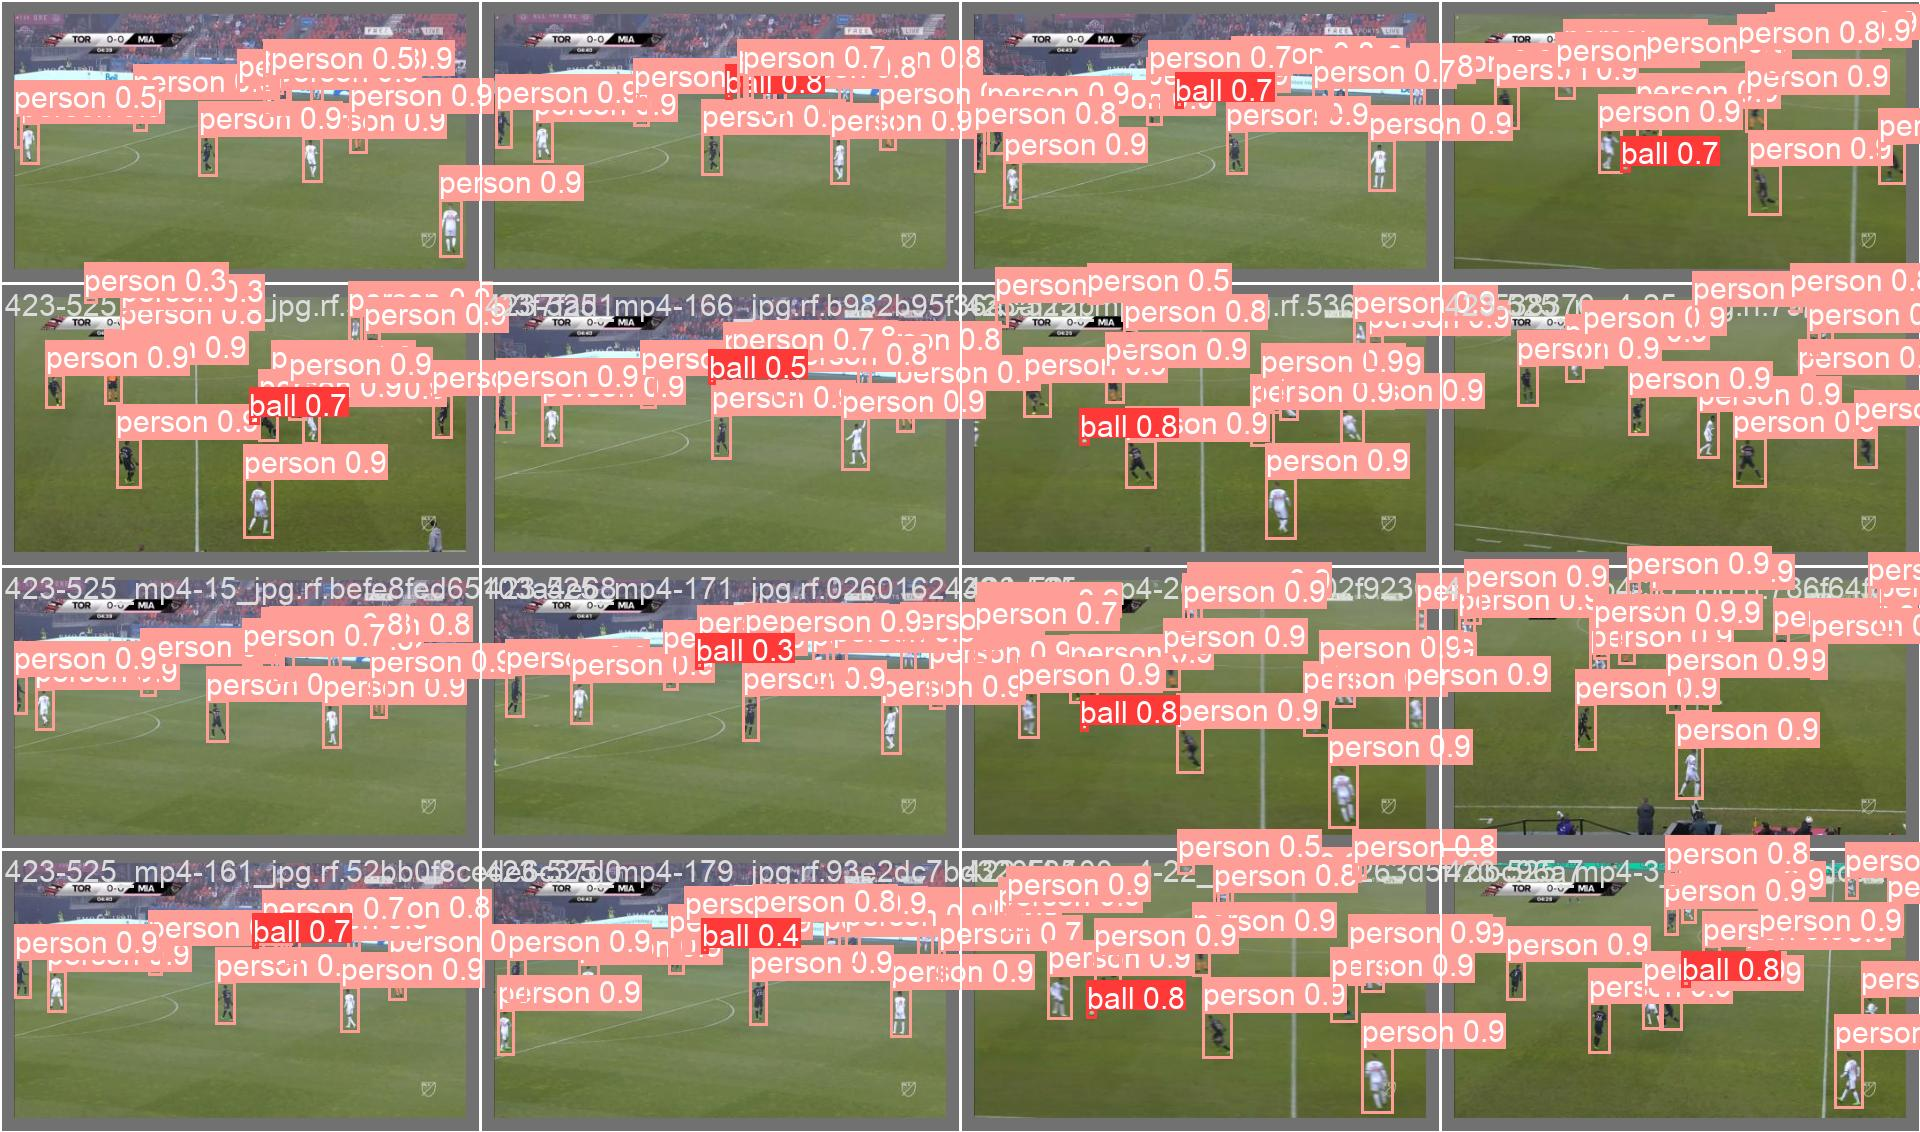

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/studio-lab-user/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /home/studio-lab-user/yolov8/datasets/football-player-detection-16
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        200       2882      0.943      0.929      0.947      0.554
                  ball        200        187       0.91      0.867      0.901      0.391
                person        200       2695      0.976      0.991      0.994      0.717
Speed: 0.4ms pre-process, 20.3ms inference, 0.0ms loss, 7.3ms post-process per image


## Inference with Custom Model

In [31]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True imgsz=512 

/home/studio-lab-user/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs
image 1/108 /home/studio-lab-user/yolov8/datasets/football-player-detection-16/test/images/313-332_mp4-10_jpg.rf.b67ee14be0bec0415588c08223167b4b.jpg: 288x512 13 persons, 61.5ms
image 2/108 /home/studio-lab-user/yolov8/datasets/football-player-detection-16/test/images/313-332_mp4-110_jpg.rf.9be7e61e0066faa88aa93891ba716361.jpg: 288x512 13 persons, 42.0ms
image 3/108 /home/studio-lab-user/yolov8/datasets/football-player-detection-16/test/images/313-332_mp4-114_jpg.rf.f341e8fb4fab053b65a1e9874eaee7e0.jpg: 288x512 12 persons, 42.0ms
image 4/108 /home/studio-lab-user/yolov8/datasets/football-player-detection-16/test/images/313-332_mp4-125_jpg.rf.e52ebdb56d7f0cf32229df2a90c9e60a.jpg: 288x512 13 persons, 33.7ms
image 5/108 /home/studio-lab-user/yolov8/datasets/football-player-detection-16/test/imag

**NOTE:** Let's take a look at few results.

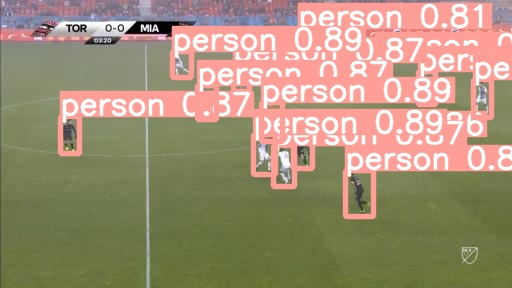

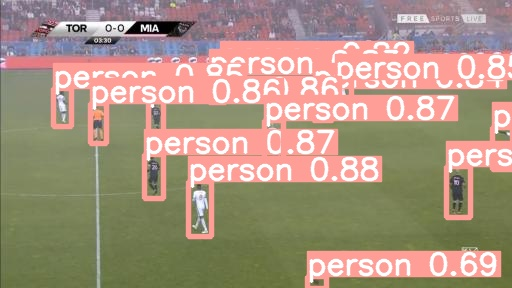

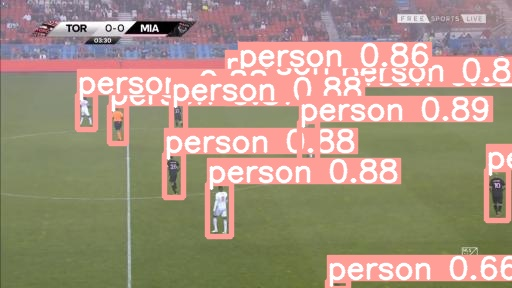

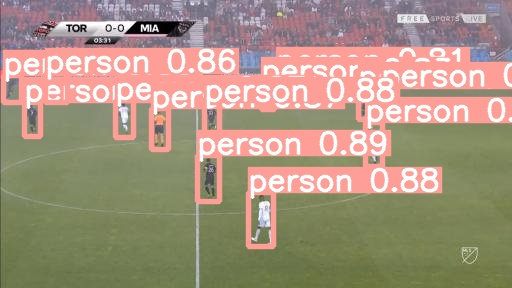

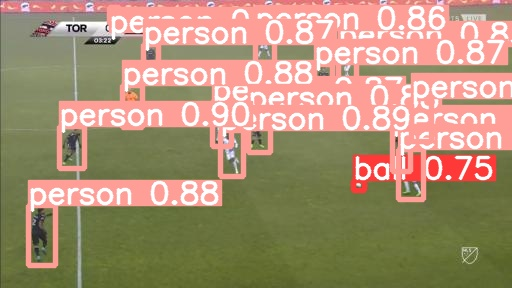

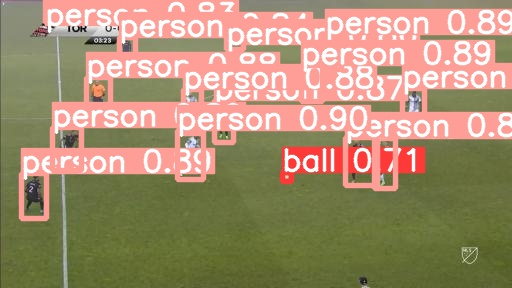

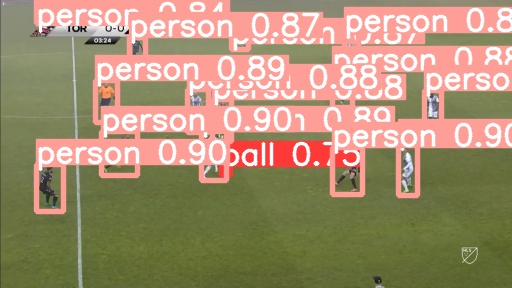

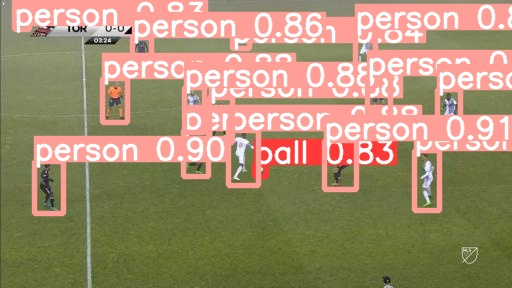

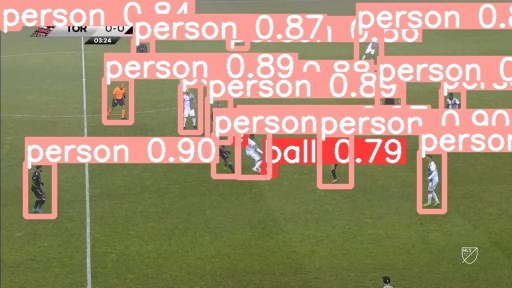

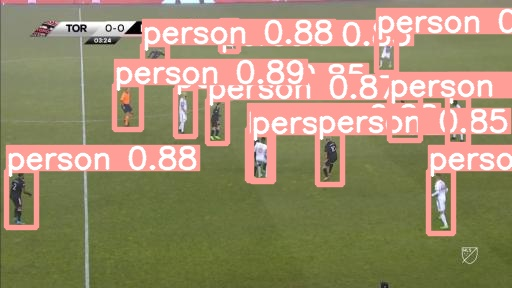

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [33]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/mlse/football-player-detection-on1w3/deploy/16


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference